Download dataset

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
train_dir = '/content/gdrive/MyDrive/TUBESAI/Data/train' 
val_dir = '/content/gdrive/MyDrive/TUBESAI/Data/valid'


print('data train : ',train_dir)
print('data val : ',val_dir)

data train :  /content/gdrive/MyDrive/TUBESAI/Data/train
data val :  /content/gdrive/MyDrive/TUBESAI/Data/valid


Validasi dataset

In [7]:
import os

covid_train_path = train_dir + '/COVID'
non_covid_train_path = train_dir + '/non-COVID'
covid_val_path = val_dir + '/COVID'
non_covid_val_path = val_dir + '/non-COVID'

covid_len_train = len(os.listdir(covid_train_path))
non_covid_len_train = len(os.listdir(non_covid_train_path))
covid_len_val = len(os.listdir(covid_val_path))
non_covid_len_val = len(os.listdir(non_covid_val_path))


print('jumlah data covid train path :', covid_len_train)
print('jumlah data non covid train :', non_covid_len_train)
print('jumlah data covid validation :', covid_len_val)
print('jumlah data non covid validation :', non_covid_len_val)

jumlah data covid train path : 1258
jumlah data non covid train : 1240
jumlah data covid validation : 1252
jumlah data non covid validation : 1230


Augmentasi & Normalisasi

In [8]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [9]:
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=50,
      width_shift_range=0.30,
      height_shift_range=0.30,
      shear_range=0.30,
      zoom_range=0.30,
      horizontal_flip=True,
      fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        val_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2498 images belonging to 2 classes.
Found 2482 images belonging to 2 classes.


Modelling

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Conv2D, AveragePooling2D, Flatten, GlobalAveragePooling2D, Dropout

In [11]:
# Feature Extraction Layer
model = Sequential()

model.add(InputLayer(input_shape=[150,150,3]))
model.add(Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(AveragePooling2D(pool_size=2, padding='same'))
model.add(Conv2D(filters=64, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(AveragePooling2D(pool_size=2, padding='same'))
model.add(Conv2D(filters=128, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(AveragePooling2D(pool_size=2, padding='same'))
model.add(Conv2D(filters=256, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(AveragePooling2D(pool_size=2, padding='same'))
model.add(GlobalAveragePooling2D())
model.add(Flatten())
#model.add(Dropout(0.0001))

In [12]:
# Fully Connected Layer
#model.add(Dense(128, activation='relu'))
#model.add(Dropout(0.0001))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
#model.add(Dropout(0.0001))
model.add(Dense(1, activation='sigmoid'))

In [13]:
# Print model summary
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 average_pooling2d (AverageP  (None, 75, 75, 32)       0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 average_pooling2d_1 (Averag  (None, 38, 38, 64)       0         
 ePooling2D)                                                     
                                                                 
 conv2d_2 (Conv2D)           (None, 38, 38, 128)       73856     
                                                                 
 average_pooling2d_2 (Averag  (None, 19, 19, 128)      0

Compile Model

In [14]:
# Compile model
from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(lr=0.0001), 
              loss='binary_crossentropy', 
              metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Training Data

In [15]:
from tensorflow.keras.optimizers import RMSprop

history = model.fit(
      train_generator,
      steps_per_epoch=4,  # images : batch_size = steps
      epochs=20,
      validation_data=validation_generator,
      validation_steps=1,  #  images = batch_size * steps
)

Epoch 1/20
4/4 [==============================] - 63s 14s/step - loss: 0.6897 - acc: 0.6000 - val_loss: 0.6979 - val_acc: 0.4000
Epoch 2/20
4/4 [==============================] - 58s 16s/step - loss: 0.6981 - acc: 0.4250 - val_loss: 0.6923 - val_acc: 0.5000
Epoch 3/20
4/4 [==============================] - 55s 15s/step - loss: 0.6949 - acc: 0.4625 - val_loss: 0.6893 - val_acc: 0.6000
Epoch 4/20
4/4 [==============================] - 53s 15s/step - loss: 0.6972 - acc: 0.3750 - val_loss: 0.6906 - val_acc: 0.6500
Epoch 5/20
4/4 [==============================] - 50s 14s/step - loss: 0.6938 - acc: 0.4250 - val_loss: 0.6932 - val_acc: 0.4500
Epoch 6/20
4/4 [==============================] - 49s 14s/step - loss: 0.6934 - acc: 0.4750 - val_loss: 0.6918 - val_acc: 0.6500
Epoch 7/20
4/4 [==============================] - 46s 12s/step - loss: 0.6935 - acc: 0.4750 - val_loss: 0.6932 - val_acc: 0.5000
Epoch 8/20
4/4 [==============================] - 47s 13s/step - loss: 0.6934 - acc: 0.4875 - val

Validasi Data

Text(0.5, 1.0, 'Training and validation loss')

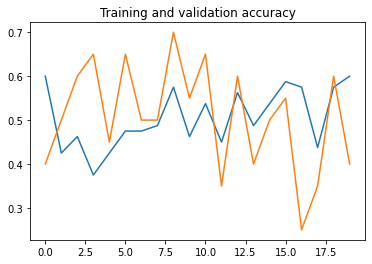

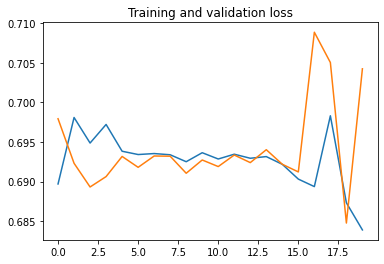

In [16]:
import matplotlib.pyplot as plt
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history.history['acc']
val_acc  = history.history['val_acc']
loss     = history.history['loss']
val_loss = history.history['val_loss']

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot  ( epochs,     acc )
plt.plot  ( epochs, val_acc )
plt.title ('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot  ( epochs,     loss )
plt.plot  ( epochs, val_loss )
plt.title ('Training and validation loss'   )

In [17]:
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, recall_score, accuracy_score
from sklearn.metrics import precision_score, confusion_matrix, classification_report
import seaborn as sns
import numpy as np
sns.set(style='whitegrid')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy  : 0.5044319097502015
Precision : 0.2544515515742354
f1Score : 0.3382692828105261
[[1252    0]
 [1230    0]]


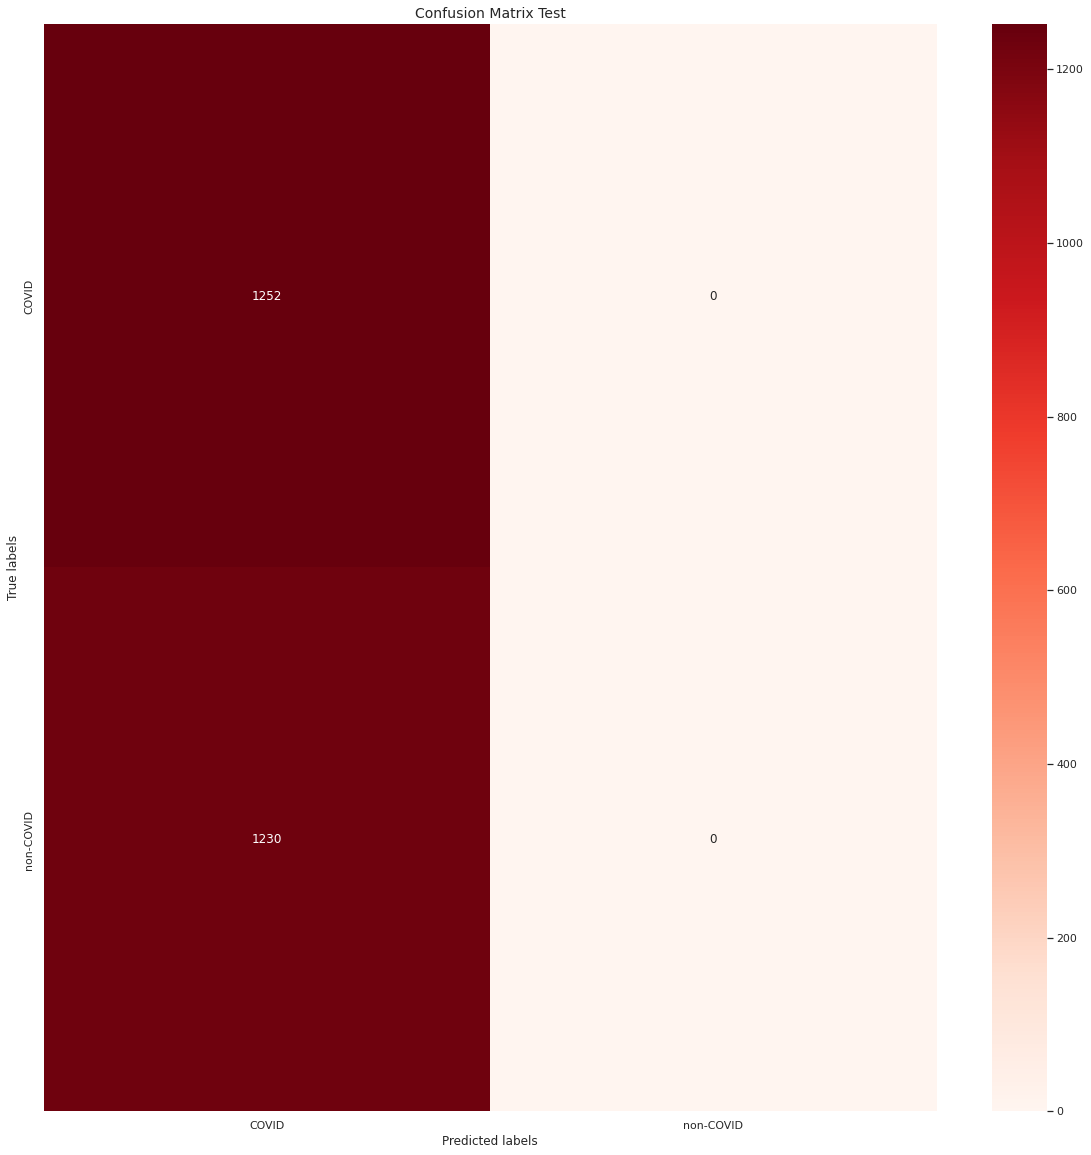

In [18]:
def my_metrics(y_true, y_pred):
    accuracy=accuracy_score(y_true, y_pred)
    precision=precision_score(y_true, y_pred,average='weighted')
    f1Score=f1_score(y_true, y_pred, average='weighted') 
    print("Accuracy  : {}".format(accuracy))
    print("Precision : {}".format(precision))
    print("f1Score : {}".format(f1Score))
    cm=confusion_matrix(y_true, y_pred)
    print(cm)
    return accuracy, precision, f1Score


predictions = model.predict_generator(generator=validation_generator)
yPredictions = predictions > 0.5
true_classes = validation_generator.classes
class_names = validation_generator.class_indices
Cmatrix_test = confusion_matrix(true_classes, yPredictions)

testAcc,testPrec, testFScore = my_metrics(true_classes, yPredictions)

plt.figure(figsize=(20,20))
ax= plt.subplot()
data = np.asarray(Cmatrix_test).reshape(2,2)
sns.heatmap(data,annot=True, fmt='',ax=ax, cmap=plt.cm.Reds)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(class_names)   
ax.yaxis.set_ticklabels(class_names)
plt.title('Confusion Matrix Test',fontsize=14)
plt.show()


Report

In [19]:
from sklearn.metrics import classification_report
print(classification_report(true_classes, yPredictions, target_names=class_names))

              precision    recall  f1-score   support

       COVID       0.50      1.00      0.67      1252
   non-COVID       0.00      0.00      0.00      1230

    accuracy                           0.50      2482
   macro avg       0.25      0.50      0.34      2482
weighted avg       0.25      0.50      0.34      2482



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
